# (2.23) Random walks and generating functions.
20220160 Jungeun Kim, Dept. of Physics, KAIST

(Sethna, "Entropy, Order Parameters, and Complexity", 2nd edition, ex. 2.10)

I did not want to draw $2^2 + 2^4 + 2^6 + 2^8$ number of possible 1D random walk, so I just wrote a code.

Consider a one-dimensional random walk with step-size $\pm 1$ starting at the origin. What is the probability $f_t$ that it first returns to the origin at $t$ steps? (See also Exercise 2.18.)

<br/>

## (a) 
Argue that the probability is zero unless $t = 2m$ is even. How many total paths are there of length $2m$? Calculate the probability for $f_{2m}$ for up to eight-step hops $(m < 5)$ by drawing the different paths that touch the origin only at their endpoints. (Hint: You can save paper by drawing the paths starting to the right, and multiplying by two. Check your answer by comparing to the results for general $m$ in eqn 2.46.)

### (a-1) Basic package

In [28]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator
import numpy as np
import sys
%matplotlib widget

# Print numpy array without truncation
# np.set_printoptions(threshold=sys.maxsize)

### (a-2) `all_possible_1D_random_walk(N)`
Generate a random walk function with `N`-steps in 1-dimension, return $2^N \times (N+1)$ matrix.

In [29]:
def all_possible_1D_random_walk(N) :
    arr_all_possible_1D_random_walk = np.zeros((1, 1))
    
    for n in range(1, N+1) :
        arr_all_possible_1D_random_walk = np.append(arr_all_possible_1D_random_walk, arr_all_possible_1D_random_walk, axis=0)  # copy and duplicate itself.
        arr_last_position = np.array([arr_all_possible_1D_random_walk[:,n-1]])              # array of last position. Same position is duplicated as [1 2 3 ... 1 2 3 ...]
        arr_pm_1 = np.array([np.append([1 for _ in range(2**(n-1))], [-1 for _ in range(2**(n-1))])])     # array of +- 1.
           

        temp_last_position = np.append(arr_last_position, arr_pm_1, axis=0)         # generate temp last position. This would be [[a, b, ...z, a, b, ..., z], [1, 1, ... 1, -1, -1, ..., -1]]
        temp_last_position = temp_last_position.sum(axis=0)                         # add the first and second row to get the last position. [a+1, b+1, ..., z+1, a-1, b-1, ..., z-1]
        temp_last_position = np.array([temp_last_position]).transpose()             # transpose the last position array to a column vector.


        arr_all_possible_1D_random_walk = np.append(arr_all_possible_1D_random_walk, temp_last_position, axis=1)    # add new last position to the total array.
        # print(arr_all_possible_1D_random_walk)

    return arr_all_possible_1D_random_walk

In [30]:
N = 8
arr_position = all_possible_1D_random_walk(N)
print(arr_position)

[[ 0.  1.  2. ...  6.  7.  8.]
 [ 0. -1.  0. ...  4.  5.  6.]
 [ 0.  1.  0. ...  4.  5.  6.]
 ...
 [ 0. -1.  0. ... -4. -5. -6.]
 [ 0.  1.  0. ... -4. -5. -6.]
 [ 0. -1. -2. ... -6. -7. -8.]]


### (a-3) `back_to_origin_1D_random_walk(N)`
Remove the path that goes back to origin before $N$-steps from the all possible path `all_possible_1D_random_walk(N)`. Then select 

In [31]:
def back_to_origin_1D_random_walk(N) :
    arr_position = all_possible_1D_random_walk(N)
    # print(arr_position)

    # Remove the path that goes back to the origin before N-steps.
    arr_bad_path = []                           # The array that stores the flag (True/False) of path whether it goes back to origin before N-steps. False means it is bad path.
    for i in range(len(arr_position)) :
        if 0 in arr_position[i][1:N] :          # Remove the path that goes back to the origin before N-steps
            arr_bad_path.append(False)
        else :
            arr_bad_path.append(True)
    arr_position = arr_position[arr_bad_path]

    # Select only the path that goes back to origin.
    arr_back_to_origin = [arr_position[i][N] == 0 for i in range(len(arr_position))]        # The array that stores the flag (True/False) of path whether it goes back to origin after N-steps.
    arr_position = arr_position[arr_back_to_origin]

    return arr_position

### (a-4) `plot_1D_random_walk(arr_position)`

In [32]:
def plot_1D_random_walk(arr_position) : 
    num_possible_path = len(arr_position)           # number of possible path, column of arr_position.
    num_steps = len(arr_position[0]) - 1            # number of steps, row of arr_position.
    # print(arr_position)

    # Define a figure with 2^N subplots that shares the axis
    fig, axs = plt.subplots(num_possible_path, sharex=True, sharey=True)
    fig.set_figheight(num_possible_path)
    fig.set_figwidth(5)

    # Use only integer as a axix ticker
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    # Add title and axis label
    fig.suptitle('Random walk in 1D as a function of time (t={})'.format(N))
    plt.xlabel(r"x(t)")
    # plt.ylabel(r'$t$')

    # # Add grid
    # plt.grid(which='both')

    t = np.arange(0, num_steps + 1)
    for i in range(num_possible_path) :
        # x position
        arr_x = arr_position[i]
        axs[i].step(arr_x, t, label='Case {}'.format(i+1))
        axs[i].set_ylabel(r'$t$')
        axs[i].legend()
    
    fig.tight_layout()
    plt.show()
    

### (a-5) `plot_1D_rms_histogram(distribution)`

In [36]:
# def plot_1D_rms_histogram(distribution) :
#     plt.figure(figsize=(8,6))

#     weight = np.ones_like(distribution)/len(distribution)
#     plt.hist(distribution, bins=50, weights=weight, label='Histogram')     # probability distribution

#     stdev = np.std(distribution)
#     print(stdev)
#     x = np.arange(-3 * stdev, 3 * stdev, stdev/100)                             # x range, from -3 sigma to 3 sigma.
#     Gaussian = np.exp(- x**2 / (2 * stdev**2)) / (np.sqrt(2 * np.pi) * stdev)   # Gaussian distribution
#     plt.plot(x, Gaussian, 'r', label='Gaussian distribution')

#     plt.title(r'Final position and its probability (t={})'.format(N))
#     plt.legend()
#     plt.xlabel(r'Final position')
#     plt.ylabel("Probability")
#     plt.plot()

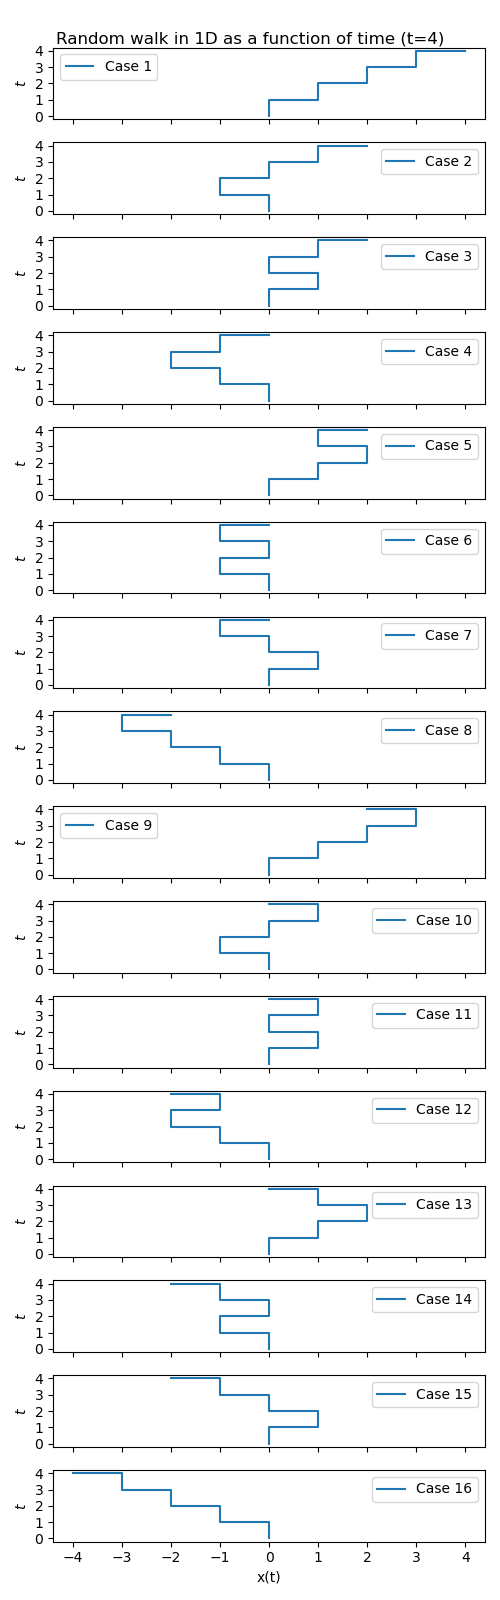

In [34]:
## Example ##
N = 4
arr_position = all_possible_1D_random_walk(N)
plot_1D_random_walk(arr_position)

### N = 2

Probability from the figure:  0.5
Probability from the function:  0.5


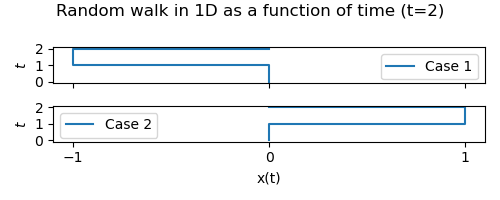

In [39]:
N = 2

arr_position = back_to_origin_1D_random_walk(N)
# print(arr_position)

prob = len(arr_position)/len(all_possible_1D_random_walk(N))
theoretical_prob = 2**(-N) / (N-1)  * np.math.factorial(N) / (np.math.factorial(N//2)**2)
print("Probability from the figure: ", prob)
print("Probability from the function: ", theoretical_prob)
plot_1D_random_walk(arr_position)

### N = 4

Probability from the figure:  0.125
Probability from the function:  0.125


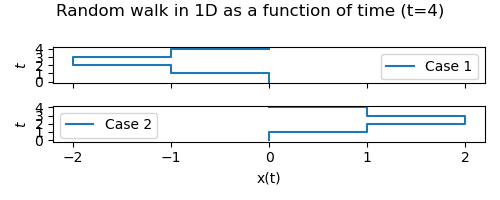

In [40]:
N = 4

arr_position = back_to_origin_1D_random_walk(N)
# print(arr_position)

prob = len(arr_position)/len(all_possible_1D_random_walk(N))
theoretical_prob = 2**(-N) / (N-1)  * np.math.factorial(N) / (np.math.factorial(N//2)**2)
print("Probability from the figure: ", prob)
print("Probability from the function: ", theoretical_prob)
plot_1D_random_walk(arr_position)

### N = 6

Probability from the figure:  0.0625
Probability from the function:  0.0625


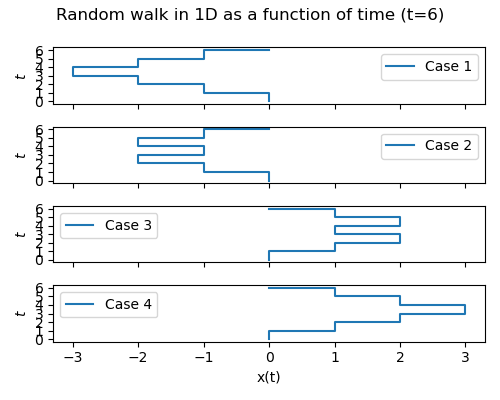

In [41]:
N = 6

arr_position = back_to_origin_1D_random_walk(N)
# print(arr_position)

prob = len(arr_position)/len(all_possible_1D_random_walk(N))
theoretical_prob = 2**(-N) / (N-1)  * np.math.factorial(N) / (np.math.factorial(N//2)**2)
print("Probability from the figure: ", prob)
print("Probability from the function: ", theoretical_prob)
plot_1D_random_walk(arr_position)

### N = 8

Probability from the figure:  0.0390625
Probability from the function:  0.0390625


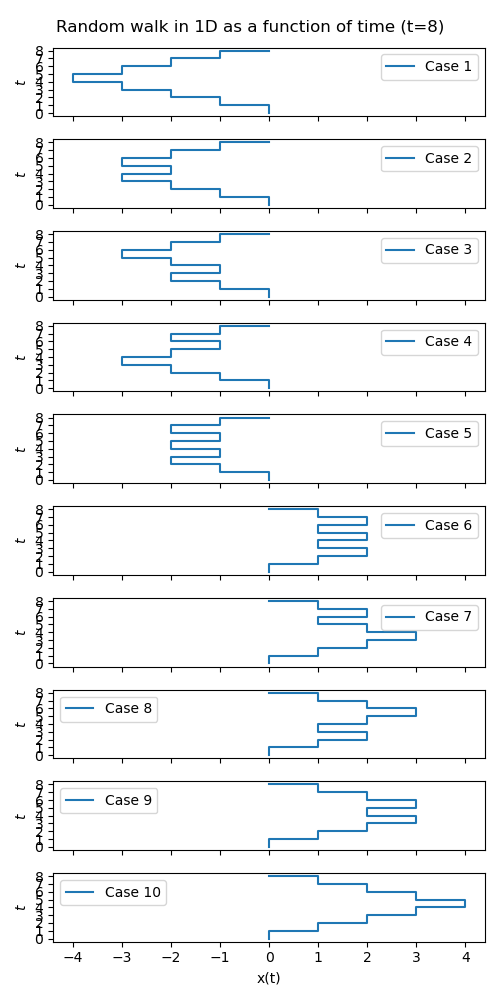

In [42]:
N = 8

arr_position = back_to_origin_1D_random_walk(N)
# print(arr_position)

prob = len(arr_position)/len(all_possible_1D_random_walk(N))
theoretical_prob = 2**(-N) / (N-1)  * np.math.factorial(N) / (np.math.factorial(N//2)**2)
print("Probability from the figure: ", prob)
print("Probability from the function: ", theoretical_prob)
plot_1D_random_walk(arr_position)